<a href="https://colab.research.google.com/github/ktuanPT373/STOCK-PRICE-PREDICTION/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the stock quotestart = datetime(2018,8,1)
end_date = datetime.today().strftime('%Y-%m-%d')
stock = 'AAPL'
df = yf.download(stock,start = start, end = end_date)
#show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.013958,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.417450,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.560425,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,49.817780,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.350731,102349600
...,...,...,...,...,...,...
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400
2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500


In [ ]:
#get the number of rounds and columns in the data set
df.shape

(69, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

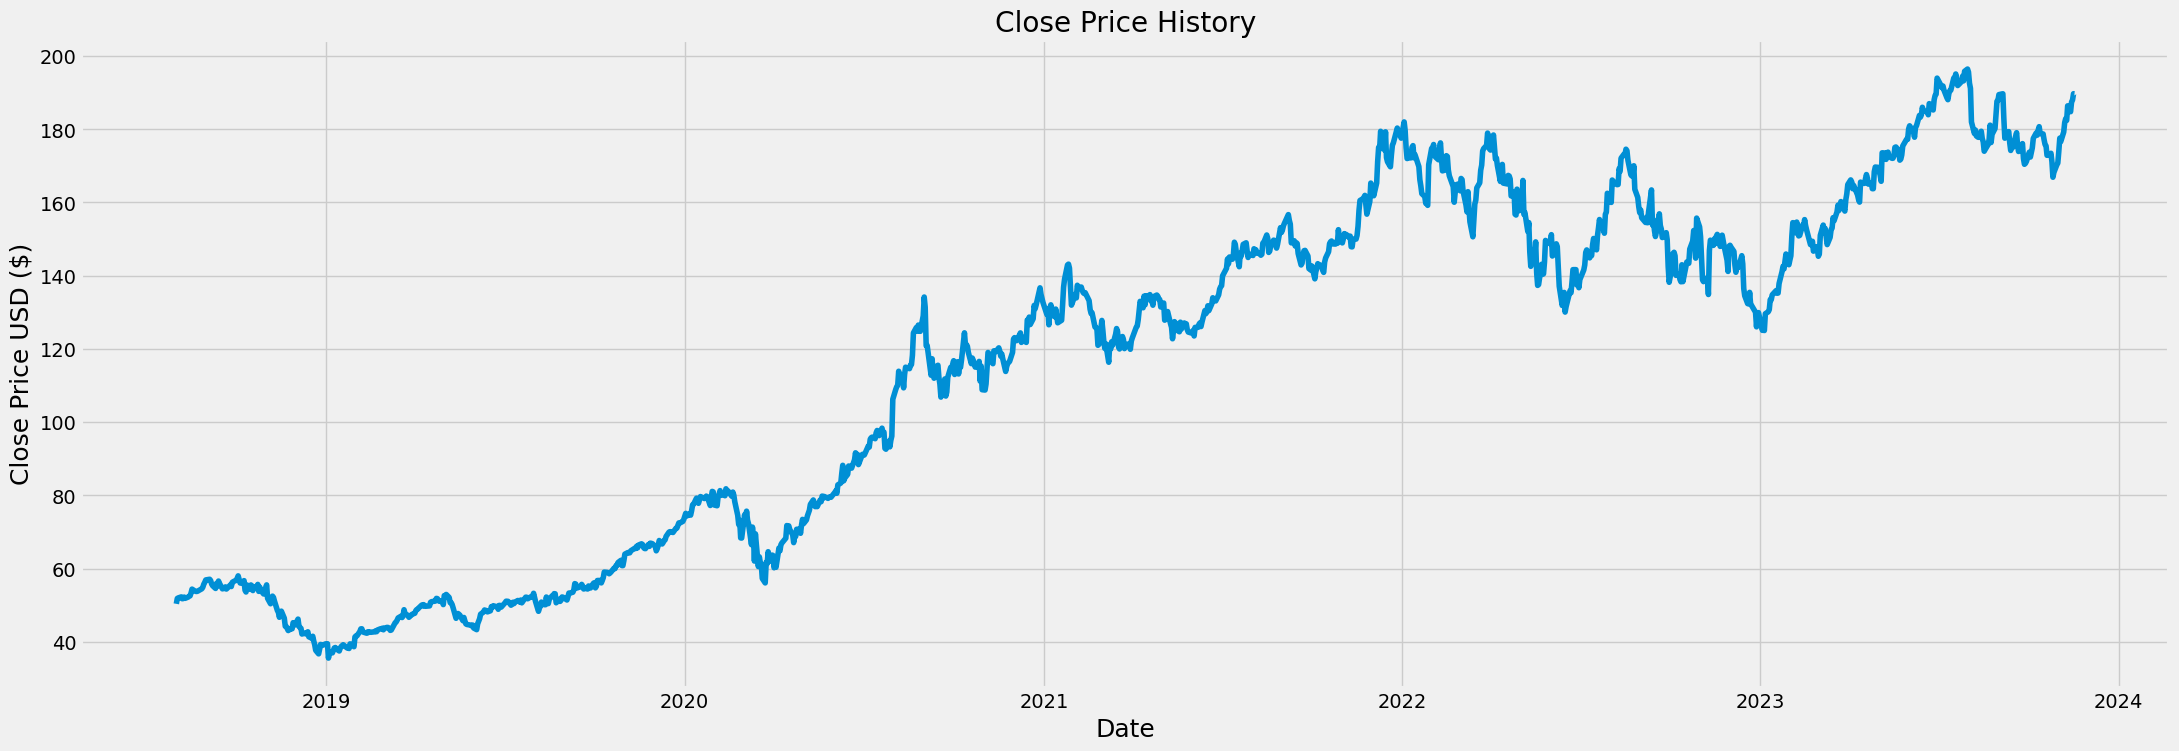

In [ ]:
#visualize the closing stock price history
plt.figure(figsize = (24,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

In [ ]:
#create a new data frame with only "Close" column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1066

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaler_data

NameError: ignored

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x-train and y-train dataset
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.09215208, 0.10130358, 0.10223583, 0.10391387, 0.10086854,
       0.10108606, 0.10361866, 0.1015211 , 0.1036031 , 0.1049704 ,
       0.10573174, 0.11051725, 0.11713616, 0.11384224, 0.11318965,
       0.11320521, 0.11388885, 0.11492985, 0.1176955 , 0.12043007,
       0.12552632, 0.12871148, 0.13275121, 0.13388543, 0.13157035,
       0.12571278, 0.12291606, 0.11830146, 0.12687809, 0.1225587 ,
       0.13085565, 0.12686253, 0.11760228, 0.11816163, 0.1183636 ,
       0.1209428 , 0.11726046, 0.12212363, 0.12429888, 0.12154876,
       0.12858718, 0.12981465, 0.13217631, 0.13531486, 0.1396498 ,
       0.13331055, 0.12756171, 0.12675379, 0.13157035, 0.1152406 ,
       0.11227295, 0.12417458, 0.11679433, 0.12423672, 0.12274514,
       0.11471233, 0.11982411, 0.12190611, 0.12513789, 0.11326734])]
[0.12058545140184274]

[array([0.09215208, 0.10130358, 0.10223583, 0.10391387, 0.10086854,
       0.10108606, 0.10361866, 0.1015211 , 0.1036031 , 0.1049704 ,
       0.10573174, 0.11051725, 0.11

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1006, 60, 1)

In [ ]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1006/1006 [==============================] - 34s 29ms/step - loss: 0.0031


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 2013 to 2591
test_data = scaled_data[training_data_len - 60 : , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))


In [ ]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

9/9 [==============================] - 1s 15ms/step


In [ ]:
#get the root mean square error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

5.32379782518279

<ipython-input-87-99e7d46b2a04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

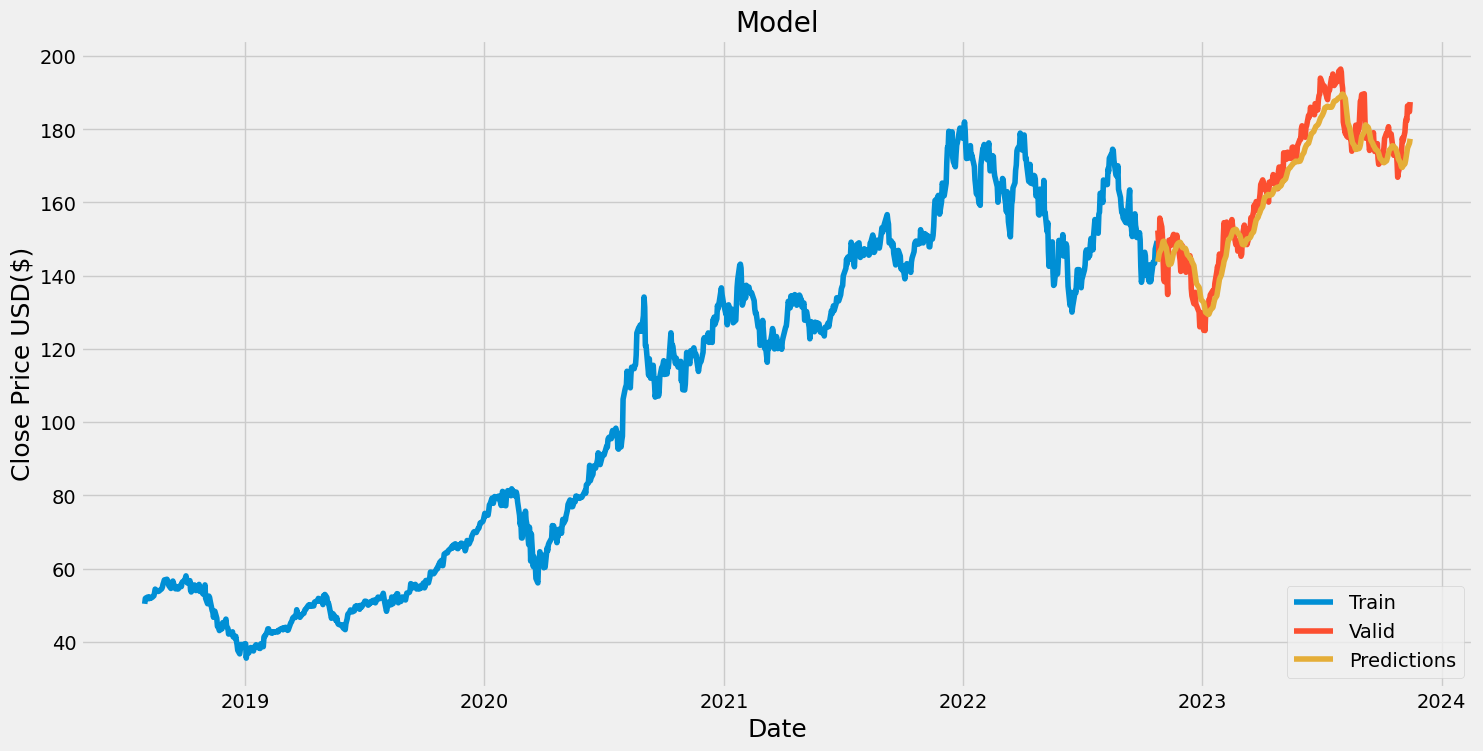

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions
#visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-10-25,152.339996,143.800110
2022-10-26,149.350006,144.972244
2022-10-27,144.800003,145.995270
2022-10-28,155.740005,146.514526
2022-10-31,153.339996,147.558258
...,...,...
2023-11-08,182.889999,172.495697
2023-11-09,182.410004,173.724564
2023-11-10,186.399994,174.884445
